Katie Briggs
Milestone 3
DSC540-301

Perform at least 5 data transformation and/or cleansing steps to your web site data. For example:

Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching

In [18]:
# import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen

In [19]:
# identify url for web data
url='https://www.volcanodiscovery.com/earthquakes/today.html'
html = urlopen(url)

In [20]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [21]:
# Get the title
title = soup.title
print(title)



<title>Earthquakes Today latest earthquakes world-wide during the past 24 hours - complete worldwide list, map and information, Monday, 13 July 2020: past 24 hours / VolcanoDiscovery</title>


In [23]:
# Print out the text
text = soup.get_text()
print(soup.text)

Earthquakes Today latest earthquakes world-wide during the past 24 hours - complete worldwide list, map and information, Monday, 13 July 2020: past 24 hours / VolcanoDiscoverywindow.googletag=window.googletag||{cmd:[]};googletag.cmd.push(function(){googletag.defineSlot('/149313552/BC-DESK300x250',[300,250],'div-gpt-ad-1590126633659-0').addService(googletag.pubads());googletag.pubads().enableSingleRequest();googletag.enableServices()});var tpid=5532,colorScheme="light",siteLang=0,loggedIn=0,menuInfo="8065,736,9769, 17,553,8127,10,8885,187,1839,549",jsconf=[],storedMarkers=[],showList=[],html="",adOnTop=0,startTime=new Date().getTime();!function(){var a="fbclid";if(-1!==location.search.indexOf(a+"=")){var d="";try{var e=new URL(location);e.searchParams.delete(a),d=e.href}catch(e){var g=new RegExp("[?&]"+a+"=.*$");d=location.search.replace(g,""),d=location.pathname+d+location.hash}history.replaceState(null,"",d)}}();(adsbygoogle=window.adsbygoogle||[]).push({google_ad_client:"ca-pub-37406

In [24]:
# find
soup.find_all('a')

[<a name="start"></a>,
 <a href="https://www.volcanodiscovery.com/home.html"><img alt="Start page" border="0" height="73" src="fileadmin/voldis/png/logo_180-3.png" width="180"/></a>,
 <a href="https://www.volcanodiscovery.com/searchresults.html" id="sBtn" onclick="show_hide('sForm');return false"><img alt="Search" height="40" src="fileadmin/voldis/png/search.png" width="40"/></a>,
 <a href="https://www.volcanodiscovery.com/home.html">Home</a>,
 <a class="rLine" data-uid="553" href="https://www.volcanodiscovery.com/earthquake-monitor.html">Earthquakes</a>,
 <a class="rLine" data-uid="5532" href="https://www.volcanodiscovery.com/earthquakes/today.html">Earthquakes Today (past 24 hrs)</a>,
 <a data-uid="8065" href="https://www.volcanodiscovery.com/travel.html">Tours</a>,
 <a data-uid="736" href="https://www.volcanodiscovery.com/photos.html">Photos</a>,
 <a data-uid="9769" href="https://www.volcanodiscovery.com/videos.html">Videos</a>,
 <a data-uid="17" href="https://www.volcanodiscovery.c

In [25]:
rows = soup.find_all('tr')
print(rows[:10])


[<tr id="topContent" style="display:none"><td colspan="3"></td></tr>, <tr><td id="aux-col" width="180"><div id="lCol"><div class="colorcell" onclick="window.open('https://www.volcanoadventures.com/app/newsletter-signup.php#1','Volcano-Adventures/VolcanoDiscovery Newsletter','height=500,width=400,location=no,resizable=yes,status=no,titlebar=no,toolbar=no,scrollbars=yes')">
Get our newsletter!</div><a href="https://www.volcanoadventures.com/" onclick="countEvent(this)" target="_blank"><img alt="Check out our volcano tours on VolcanoAdventures.com!" border="0" height="102" name="dest" src="fileadmin/voldis/png/destmap.png" usemap="#dest" width="180"/></a><div class="colorcell" id="applink"><a href="https://play.google.com/store/apps/details?id=com.volcanodiscovery.volcanodiscovery" target="_blank">Our Android App</a></div><center><a href="//play.google.com/store/apps/details?id=com.volcanodiscovery.volcanodiscovery" target="_blank"><img alt="Volcanoes &amp; Earthquakes - new app for Andro

In [26]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td><a class="sl2" href="earthquakes/quake-info/2881458/M4-Sun-12-Jul-New-Zealand.html" title="detail info for this quake">Sun, 12 Jul 04:19 UTC</a></td>, <td>M 4.4 / 33 km - [<a class="sl" href="earthquakes/quake-info/2881458/M4-Sun-12-Jul-New-Zealand.html" title="detail info for this quake">info</a>]</td>, <td class="vdi"><span class="vlink">(</span>188 km<span class="vlink">)</span></td>, <td><img height="11" src="fileadmin/flags/16x11/nz.png" title="New Zealand" width="16"/> New Zealand<br/><a href="#" onclick="mkRep(2881458);return false" style="font-style:italic;color:blue" title="I felt this quake - click to share your experience with others">I FELT IT</a> <b><a href="earthquakes/quake-info/2881458/M4-Sun-12-Jul-New-Zealand.html"></a></b></td>, <td><b><div class="eqloc"><div class="eqloc_4" style="background-position:-10px 7px"><a href="#" onclick="openPopup(-33.65008,-178.56731,2881458);return false"><img alt="" height="25" src="https://ww2.volcanodiscovery.com/clear.gif" widt

bs4.element.ResultSet

In [28]:
# find all earthquake events for the day, each earthquake have their own html sites
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

None
https://www.volcanodiscovery.com/home.html
https://www.volcanodiscovery.com/searchresults.html
https://www.volcanodiscovery.com/home.html
https://www.volcanodiscovery.com/earthquake-monitor.html
https://www.volcanodiscovery.com/earthquakes/today.html
https://www.volcanodiscovery.com/travel.html
https://www.volcanodiscovery.com/photos.html
https://www.volcanodiscovery.com/videos.html
https://www.volcanodiscovery.com/volcanoes.html
https://www.volcanodiscovery.com/earthquake-monitor.html
https://www.volcanodiscovery.com/geology.html
https://www.volcanodiscovery.com/news.html
https://www.volcanodiscovery.com/shop.html
https://www.volcanodiscovery.com/about/volcanodiscovery.html
https://www.volcanodiscovery.com/photoglossary.html
https://www.volcanodiscovery.com/volcanoes/faq.html
contact_us.html
privacy.html
https://www.volcanodiscovery.com/imprint.html
https://www.volcanodiscovery.com/news.rss
https://www.volcanodiscovery.com/fr/seismes/derniers.html
https://www.volcanodiscovery.com

In [27]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Sun, 12 Jul 04:19 UTC, M 4.4 / 33 km - [info], (188 km),  New ZealandI FELT IT , [Map], GEONET (NZ)]


In [31]:
# clean data
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Sun, 12 Jul 04:19 UTC, M 4.4 / 33 km - [info], (188 km),  New ZealandI FELT IT , [Map], GEONET (NZ)]


str

In [33]:
# create dataframe
df = pd.DataFrame(list_rows)
df.head(20)

,0
0,[]
1,[\nGet our newsletter!Our Android AppNew: IOS ...
2,"[Time, Mag. / Depth, Nearest volcano (distance..."
3,"[Mon, 13 Jul 2020 (20 earthquakes)]"
4,"[Mon, 13 Jul 03:29 UTC, M 2.8 / 35.3 km - [inf..."
5,"[Mon, 13 Jul 03:24 UTC, M 3.5 / 24 km - [info]..."
6,"[Mon, 13 Jul 03:20 UTC, M 3.1 / 28.7 km - [inf..."
7,"[Mon, 13 Jul 02:57 UTC, M 2.9 / 14 km - [info]..."
8,"[Mon, 13 Jul 02:43 UTC, M 4.2 / 10 km - [info]..."
9,"[Mon, 13 Jul 02:41 UTC, M 2.7 / 18 km - [info]..."


In [34]:
# manipulate data by spilting string
df1 = df[0].str.split(',', expand=True)
df1.head(20)

,0,1,2,3,4,5,6,7,8,9,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270
0,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,[\nGet our newsletter!Our Android AppNew: IOS ...,photo tours,and relaxed walking &amp; study tours.Volcano...,salt and volcanoes - Danakil desert (Ethiopia...,the free Volcano Webcams tool and interactive...,both time- and server cost intensive effort.I...,and help keep it alive and improve it,please consider making a small donation (PayP...,,Most recent earthquakes world-wide(read more)...,...,Alaska (USA)I FELT IT,[Map],USGS,Sun,12 Jul 04:19 UTC,M 4.4 / 33 km - [info],(188 km),New ZealandI FELT IT,[Map],GEONET (NZ)]
2,[Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[Mon,13 Jul 2020 (20 earthquakes)],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[Mon,13 Jul 03:29 UTC,M 2.8 / 35.3 km - [info],(32 km),Island of Hawaii,Hawaii (USA),[Map],USGS],None,None,...,None,None,None,None,None,None,None,None,None,None
5,[Mon,13 Jul 03:24 UTC,M 3.5 / 24 km - [info],(149 km),Simeulue,IndonesiaI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
6,[Mon,13 Jul 03:20 UTC,M 3.1 / 28.7 km - [info],(140 km),New ZealandI FELT IT,[Map],GEONET (NZ)],None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,[Mon,13 Jul 02:57 UTC,M 2.9 / 14 km - [info],Kilauea (29 km) - Hawai'i,Island Of Hawaii,Hawaii (USA),[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
8,[Mon,13 Jul 02:43 UTC,M 4.2 / 10 km - [info],(283 km),Oaxaca,MexicoI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
9,[Mon,13 Jul 02:41 UTC,M 2.7 / 18 km - [info],(566 km),Sw Cabo De San Vicente (Portugal),[Map],IGN],None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
#format data into a more readable format
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,\nGet our newsletter!Our Android AppNew: IOS v...,photo tours,and relaxed walking &amp; study tours.Volcano...,salt and volcanoes - Danakil desert (Ethiopia...,the free Volcano Webcams tool and interactive...,both time- and server cost intensive effort.I...,and help keep it alive and improve it,please consider making a small donation (PayP...,,Most recent earthquakes world-wide(read more)...,...,Alaska (USA)I FELT IT,[Map],USGS,Sun,12 Jul 04:19 UTC,M 4.4 / 33 km - [info],(188 km),New ZealandI FELT IT,[Map],GEONET (NZ)]
2,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mon,13 Jul 2020 (20 earthquakes)],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Mon,13 Jul 03:29 UTC,M 2.8 / 35.3 km - [info],(32 km),Island of Hawaii,Hawaii (USA),[Map],USGS],None,None,...,None,None,None,None,None,None,None,None,None,None
5,Mon,13 Jul 03:24 UTC,M 3.5 / 24 km - [info],(149 km),Simeulue,IndonesiaI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
6,Mon,13 Jul 03:20 UTC,M 3.1 / 28.7 km - [info],(140 km),New ZealandI FELT IT,[Map],GEONET (NZ)],None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Mon,13 Jul 02:57 UTC,M 2.9 / 14 km - [info],Kilauea (29 km) - Hawai'i,Island Of Hawaii,Hawaii (USA),[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
8,Mon,13 Jul 02:43 UTC,M 4.2 / 10 km - [info],(283 km),Oaxaca,MexicoI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
9,Mon,13 Jul 02:41 UTC,M 2.7 / 18 km - [info],(566 km),Sw Cabo De San Vicente (Portugal),[Map],IGN],None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [36]:
col_labels = soup.find_all('th')

In [37]:
# replace headers
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[]']


In [38]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,[]


In [40]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

# merge dataframes for clean dataframe
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,\nGet our newsletter!Our Android AppNew: IOS v...,photo tours,and relaxed walking &amp; study tours.Volcano...,salt and volcanoes - Danakil desert (Ethiopia...,the free Volcano Webcams tool and interactive...,both time- and server cost intensive effort.I...,and help keep it alive and improve it,please consider making a small donation (PayP...,,Most recent earthquakes world-wide(read more)...,...,Alaska (USA)I FELT IT,[Map],USGS,Sun,12 Jul 04:19 UTC,M 4.4 / 33 km - [info],(188 km),New ZealandI FELT IT,[Map],GEONET (NZ)]
2,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mon,13 Jul 2020 (20 earthquakes)],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Mon,13 Jul 03:29 UTC,M 2.8 / 35.3 km - [info],(32 km),Island of Hawaii,Hawaii (USA),[Map],USGS],None,None,...,None,None,None,None,None,None,None,None,None,None
5,Mon,13 Jul 03:24 UTC,M 3.5 / 24 km - [info],(149 km),Simeulue,IndonesiaI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
6,Mon,13 Jul 03:20 UTC,M 3.1 / 28.7 km - [info],(140 km),New ZealandI FELT IT,[Map],GEONET (NZ)],None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Mon,13 Jul 02:57 UTC,M 2.9 / 14 km - [info],Kilauea (29 km) - Hawai'i,Island Of Hawaii,Hawaii (USA),[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None
8,Mon,13 Jul 02:43 UTC,M 4.2 / 10 km - [info],(283 km),Oaxaca,MexicoI FELT IT,[Map],EMSC],None,None,...,None,None,None,None,None,None,None,None,None,None


In [56]:
df5 = df4.rename(columns=df4.iloc[3])
df5.head()

,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,\nGet our newsletter!Our Android AppNew: IOS v...,photo tours,and relaxed walking &amp; study tours.Volcano...,salt and volcanoes - Danakil desert (Ethiopia...,the free Volcano Webcams tool and interactive...,both time- and server cost intensive effort.I...,and help keep it alive and improve it,please consider making a small donation (PayP...,,Most recent earthquakes world-wide(read more)...,...,Alaska (USA)I FELT IT,[Map],USGS,Sun,12 Jul 04:19 UTC,M 4.4 / 33 km - [info],(188 km),New ZealandI FELT IT,[Map],GEONET (NZ)]
2,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mon,13 Jul 2020 (20 earthquakes)],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [43]:
# format data into a more readable format
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 150
Columns: 3271 entries, Time to None
dtypes: object(3271)
memory usage: 3.8+ MB


(152, 3271)

In [44]:
# remove missing values from data

df6 = df5.dropna(axis=0, how='any')

In [49]:
df7 = df6.drop(df6.index[0])
df7.head()

,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KeyError: 'Location'

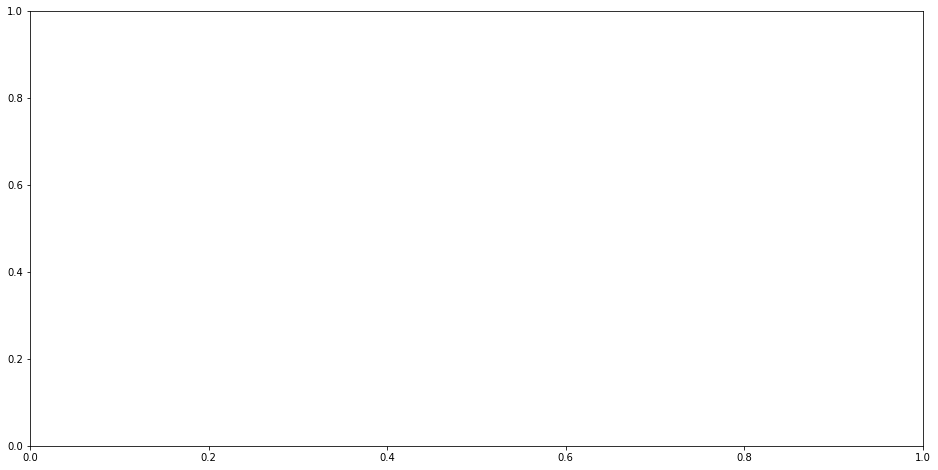

In [59]:
# identify outliers

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df5['Time'], df5['Location'])
ax.set_xlabel('Depth of Earthquake')
ax.set_ylabel('Location of Earthquake')
plt.show()

In [62]:
#calculate the IQR for each column in dataframe

Q1 = df5.quantile(0.25)
Q3 = df5.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Series([], dtype: float64)


In [64]:
print(df5 < (Q1 - 1.5 * IQR)) |(df5 > (Q3 + 1.5 * IQR))

      Time   Mag. / Depth   Nearest volcano (distance)   Location    Map  \
0    False          False                        False      False  False   
0    False          False                        False      False  False   
1    False          False                        False      False  False   
2    False          False                        False      False  False   
3    False          False                        False      False  False   
..     ...            ...                          ...        ...    ...   
146  False          False                        False      False  False   
147  False          False                        False      False  False   
148  False          False                        False      False  False   
149  False          False                        False      False  False   
150  False          False                        False      False  False   

      Source]    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN  \
0       F

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [66]:
df5 = df5[~((df5< (Q1 - 1.5 * IQR)) |(df5 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

(152, 3271)

In [67]:
df5.dropna()


,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nGet our newsletter!Our Android AppNew: IOS v...,photo tours,and relaxed walking &amp; study tours.Volcano...,salt and volcanoes - Danakil desert (Ethiopia...,the free Volcano Webcams tool and interactive...,both time- and server cost intensive effort.I...,and help keep it alive and improve it,please consider making a small donation (PayP...,,Most recent earthquakes world-wide(read more)...,...,Alaska (USA)I FELT IT,[Map],USGS,Sun,12 Jul 04:19 UTC,M 4.4 / 33 km - [info],(188 km),New ZealandI FELT IT,[Map],GEONET (NZ)]


In [68]:
# find duplicates in dataframe
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df5[df5.duplicated()]


In [69]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [Time,  Mag. / Depth,  Nearest volcano (distance),  Location,  Map,  Source], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, ...]
Index: []

[0 rows x 3271 columns]


In [70]:
# fix casings

df5.columns = map(str.upper, df5.columns)
df5

TypeError: descriptor 'upper' requires a 'str' object but received a 'NoneType'

In [71]:
# change casing in dataframe to upper and lower case with title
df5.apply(lambda x: x.astype(str).str.title())

,Time,Mag. / Depth,Nearest volcano (distance),Location,Map,Source],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[],Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,...,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,\nGet Our Newsletter!Our Android Appnew: Ios V...,Photo Tours,And Relaxed Walking &Amp; Study Tours.Volcano...,Salt And Volcanoes - Danakil Desert (Ethiopia...,The Free Volcano Webcams Tool And Interactive...,Both Time- And Server Cost Intensive Effort.I...,And Help Keep It Alive And Improve It,Please Consider Making A Small Donation (Payp...,,Most Recent Earthquakes World-Wide(Read More)...,...,Alaska (Usa)I Felt It,[Map],Usgs,Sun,12 Jul 04:19 Utc,M 4.4 / 33 Km - [Info],(188 Km),New Zealandi Felt It,[Map],Geonet (Nz)]
2,Time,Mag. / Depth,Nearest Volcano (Distance),Location,Map,Source],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mon,13 Jul 2020 (20 Earthquakes)],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Sun,12 Jul 04:32 Utc,M 3.4 / 109 Km - [Info],(48 Km),49 Km Al E De Pica (Chile)I Felt It,[Map],Gug (U. Chile)],None,None,None,...,None,None,None,None,None,None,None,None,None,None
147,Sun,12 Jul 04:29 Utc,M 3.3 / 10 Km - [Info],(1251 Km),Tropical North East,Qld (Australia)I Felt It,[Map],Geoau],None,None,...,None,None,None,None,None,None,None,None,None,None
148,Sun,12 Jul 04:22 Utc,M 3.2 / 27 Km - [Info],(65 Km),11 Km Al Este De Puerto Armuelles,Panama.I Felt It,[Map],Rsn],None,None,...,None,None,None,None,None,None,None,None,None,None
149,Sun,12 Jul 04:20 Utc,M 4.6 / 37 Km - [Info],(85 Km),104 Km Ssw Of Nikolski,Alaska (Usa)I Felt It,[Map],Usgs],None,None,...,None,None,None,None,None,None,None,None,None,None


In [80]:
# Conduct Fuzzy Matching
compare = pd.MultiIndex.from_product([df5['Time']]).to_series()


In [81]:
def metrics(tup):
    return pd.Series([fuzz.ratio(*tup),
                      fuzz.token_sort_ratio(*tup)],
                     ['ratio', 'token'])

In [82]:
compare.apply(metrics)

IndexError: tuple index out of range

In [83]:
compare.apply(metrics).unstack().idxmax().unstack(0)

IndexError: tuple index out of range

In [84]:
compare

Time                                                                                                                                                                                                                                                                           
[]                                                                                                                                                                                                                                                                                                                             ([],)
]                                                                                                                                                                                                                                                                                                                               (],)
\nGet our newsletter!Our Android AppNew: IOS versionOur New BookVolcano Discov